# Procesamiento de Imágenes - Trabajo Práctico N° 6

## Grupo 3
* Santiago Arribére
* Matias Francois
* Joaquín Gaytan
* Pablo Scheinfeld

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors

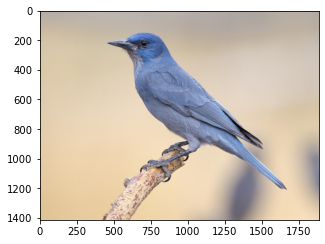

In [2]:
bird = cv2.cvtColor(cv2.imread('../assets/bird.jpg'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(bird)
plt.show()

## Visualizacion en el espacio de color RGB

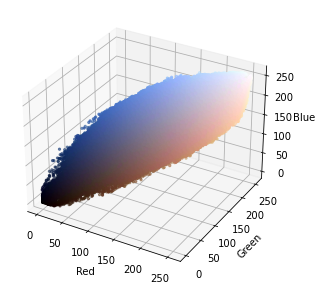

In [3]:
r, g, b = cv2.split(bird)
fig = plt.figure(figsize=(5,5))
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = bird.reshape((np.shape(bird)[0]*np.shape(bird)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Nuevamente es posible observar como en el espacio de color RGB es complejo realizar la segmentación por color, debido a que el color de interés no se encuentra localizado en ninguno de los 3 ejes.

## Visualizacion en el espacio de color HSV

In [4]:
hsv_bird = cv2.cvtColor(bird, cv2.COLOR_RGB2HSV)

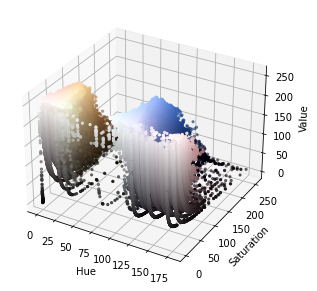

In [5]:
h, s, v = cv2.split(hsv_bird)
fig = plt.figure(figsize=(5,5))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

## Sacando al pajaro

In [6]:
light_blue = (100, 50, 150)
dark_blue =  (130, 200, 255)

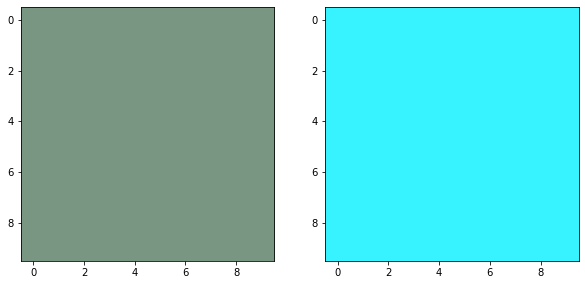

In [7]:
lo_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(colors.hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(colors.hsv_to_rgb(do_square))
plt.show()

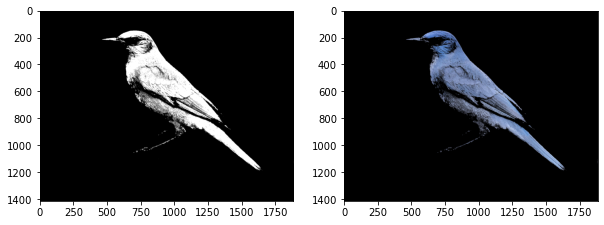

In [8]:
mask = cv2.inRange(hsv_bird, light_blue, dark_blue)
result = cv2.bitwise_and(bird, bird, mask=mask)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [9]:
light_white = (90, 20, 170)
dark_white = (130, 60, 255)

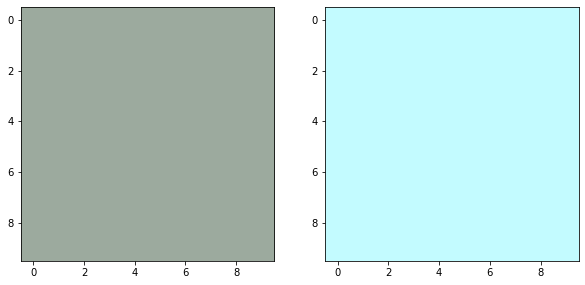

In [10]:
lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(colors.hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(colors.hsv_to_rgb(dw_square))
plt.show()

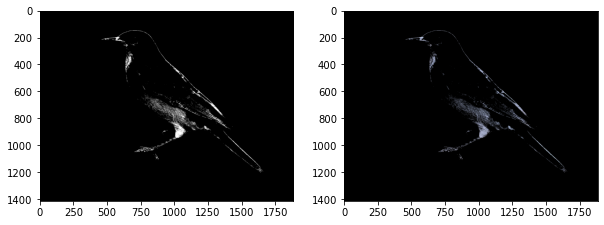

In [11]:
mask_white = cv2.inRange(hsv_bird, light_white, dark_white)
result_white = cv2.bitwise_and(bird, bird, mask=mask_white)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

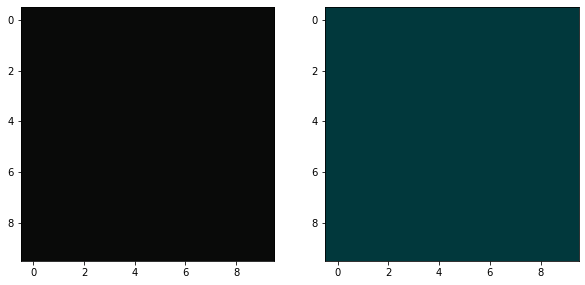

In [12]:
light_black = (90, 20, 10)
dark_black = (130, 250, 60)

lw_square = np.full((10, 10, 3), light_black, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_black, dtype=np.uint8) / 255.0

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(colors.hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(colors.hsv_to_rgb(dw_square))
plt.show()

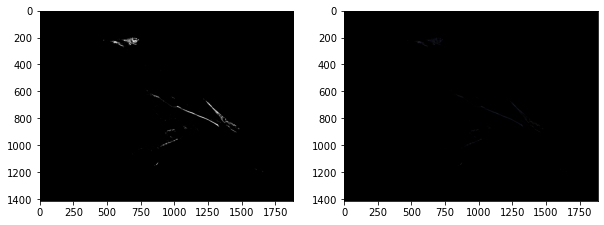

In [13]:
mask_black = cv2.inRange(hsv_bird, light_black, dark_black)
result_black = cv2.bitwise_and(bird, bird, mask=mask_black)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mask_black, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_black)
plt.show()

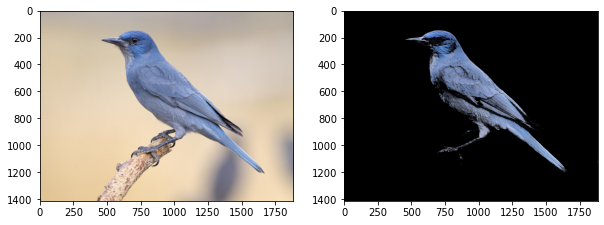

In [14]:
final_mask = mask + mask_white + mask_black

final_result = cv2.bitwise_and(bird, bird, mask=final_mask)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(bird)
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [15]:
cv2.imwrite('output/bird_2.jpg', cv2.cvtColor(final_result, cv2.COLOR_RGB2BGR))

True